# Laptop Price Prediction

In [2]:
#This project uses machine learning algorithms to estimate laptop prices.
#The purpose statement is that when a user wishes to buy a laptop,
#this project should be able to present a tentative laptop price based on the user's preferences.
# in this report , i am using linear regression,ridge regression,lasso regresion, knn, decision tree
#the dataset is taken from kaggle.i have a noisy dataset and requires extensive feature engineering and processing, 


In [3]:
# import libraries
import numpy as np # linear allgebra
import pandas as pd # data analysis and manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # seaborn for data vizualization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # pipeline
from sklearn.preprocessing import OneHotEncoder #one hot encodig
from sklearn.metrics import r2_score,mean_absolute_error # performance and error
from sklearn.linear_model import LinearRegression,Ridge,Lasso # linear model
from sklearn.neighbors import KNeighborsRegressor # knn model
from sklearn.tree import DecisionTreeRegressor # decision tree model
sns.set_context('poster', font_scale = 2) # style
sns.set_theme() # style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})# style
sns.set(rc = {'figure.figsize':(15,8)}) # fig size

In [4]:
df = pd.read_csv('laptop_data.csv') # csv file read from local environment
df.head(10) # display top 10 records

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


# Data Pre-processing and Data exploration

In [5]:
# finding shape of the data
shapes = df.shape
print()
print("shape of the dataset :",shapes)
print()
# it has 1303 records and 12 columns


shape of the dataset : (1303, 12)



In [6]:
df.info() # information about dataset. i have 1303 records and 12 columns , price is my target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum() # checking if any duplicate records in datset

0

In [8]:
df.isnull().sum() # checking null values

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# droping unnamed columns. this is index, so, no need 
df.drop(columns=['Unnamed: 0'],inplace=True) # inplace true for remove permenently

#### Ram and Weight

In [10]:
# removing string in ram and weight
df['Ram'] = df['Ram'].str.replace('GB','') # replacing gb in ram with white space
df['Weight'] = df['Weight'].str.replace('kg','')# replacing kg in weight with white space

In [11]:
# changing datatypes from object to integer
df['Ram'] = df['Ram'].astype('int32') # convert into int32 for ram
df['Weight'] = df['Weight'].astype('float32')# convert into int32 for weight

#### univariate and bivariate  analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

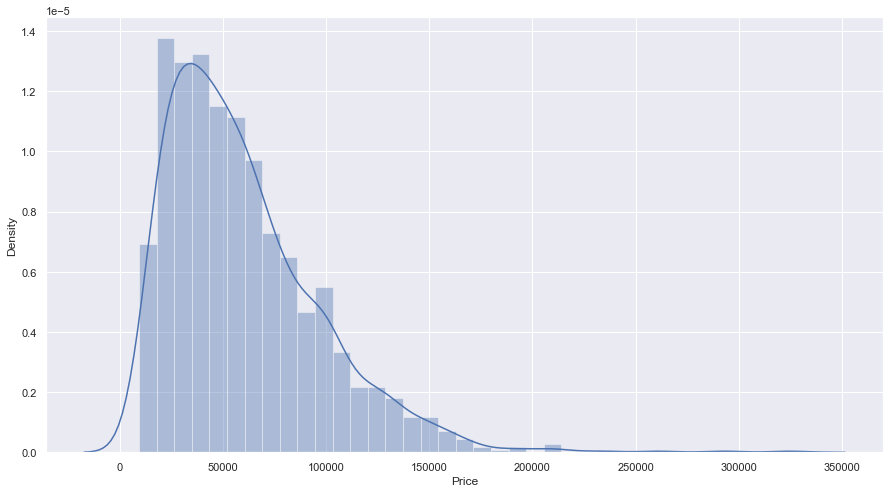

In [12]:
sns.distplot(df['Price']) # distribution of price in dataset
# my price is target, it has little skewness, this not big deal because some laptops like apple are high rate 
# comparing others

<AxesSubplot:>

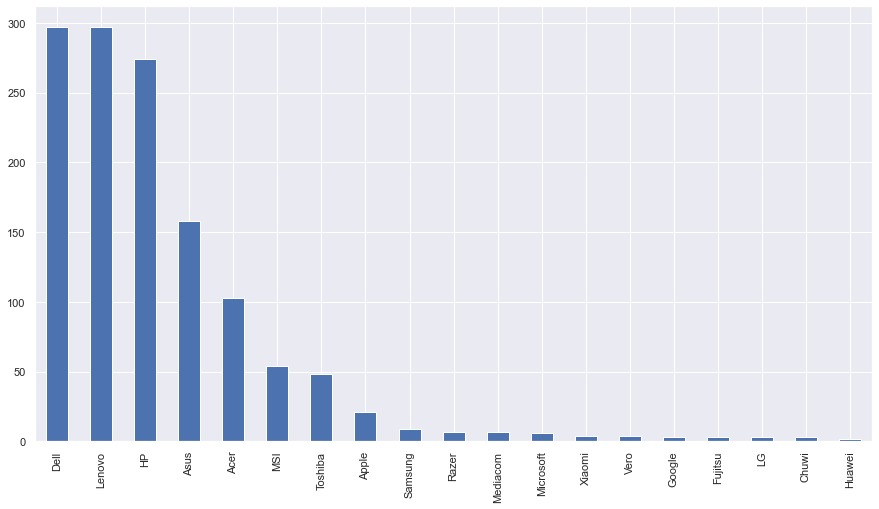

In [13]:
df['Company'].value_counts().plot(kind='bar') # counts of company in bor plot

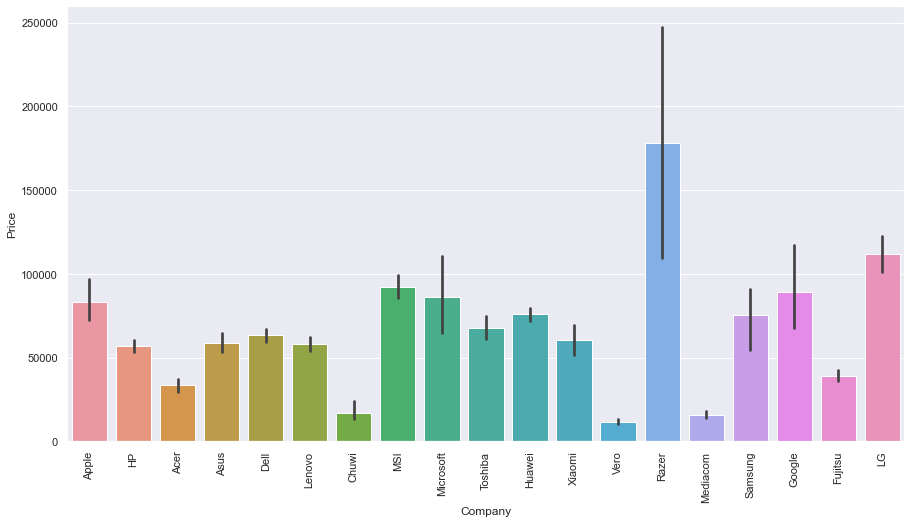

In [14]:
# what is the distribution price by company?
# vizualizing company by price 
sns.barplot(x=df['Company'],y=df['Price']) # barplot company in x axis and price in y axis
plt.xticks(rotation='vertical') # ticks for vertical bar
plt.show()
# we can see the apple , razer,lg are high in price eventhough it has low value counts

<AxesSubplot:>

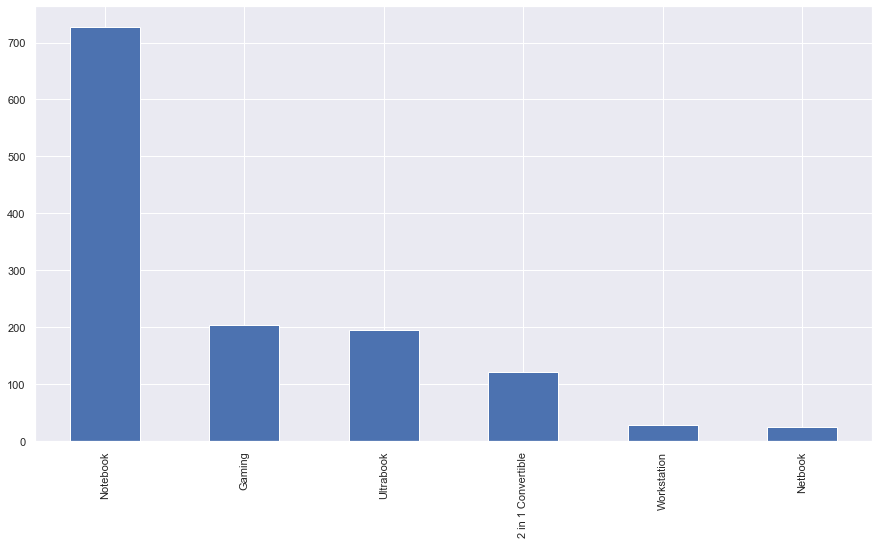

In [15]:
df['TypeName'].value_counts().plot(kind='bar') # vizualise the typename by count

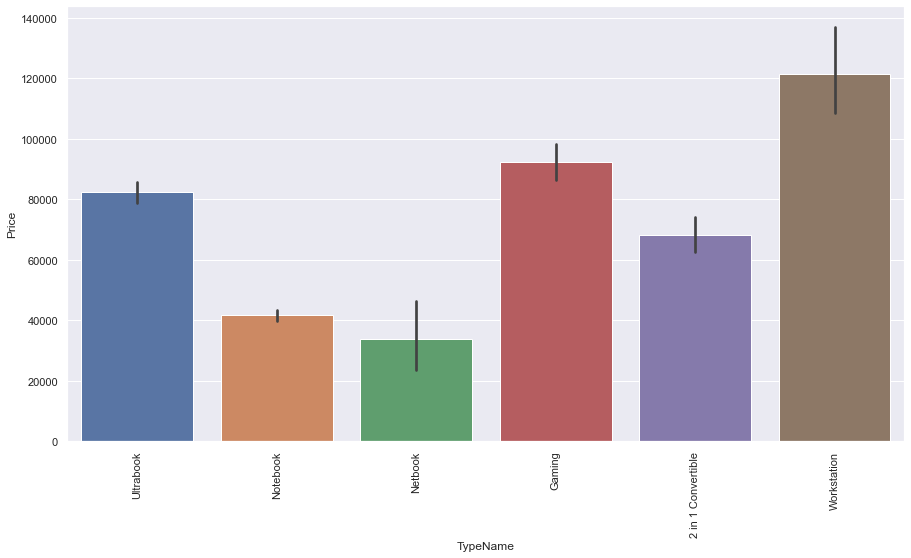

In [16]:
# visualizing typename by price
sns.barplot(x=df['TypeName'],y=df['Price']) # typename in x and price in y
plt.xticks(rotation='vertical') # vertical bar
plt.show()
# ultra book, workstation  are high rate but it has low value counts

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

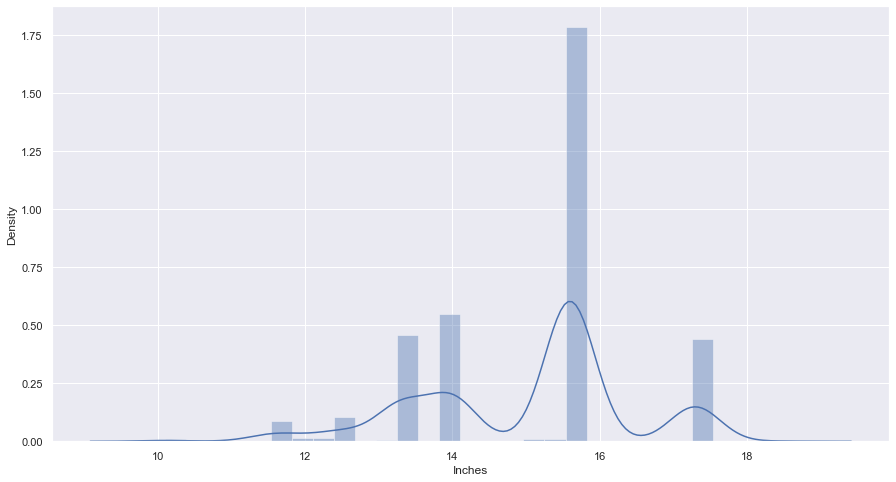

In [17]:
sns.distplot(df['Inches']) # distribution of inches

<AxesSubplot:xlabel='Inches', ylabel='Price'>

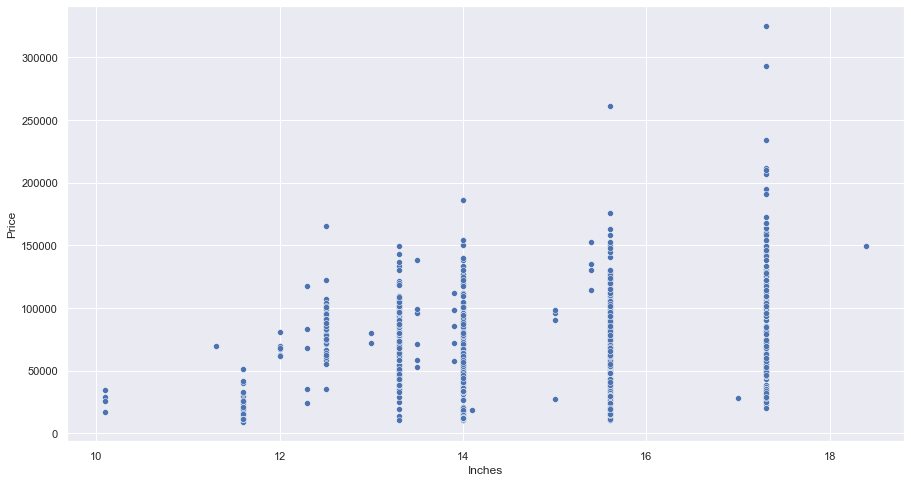

In [18]:
sns.scatterplot(x=df['Inches'],y=df['Price']) # distribution of inches by price in scatter plot
# if inches are high ,prices also increase

#### SCREEN RESOLUTIONS

In [19]:
df['ScreenResolution'].value_counts() # n unique for screenresolution

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# Seperate touch screen from screen resolution and creat new column called touchscreen 
# if touch screen is 1 and not touch screen is 0

<AxesSubplot:>

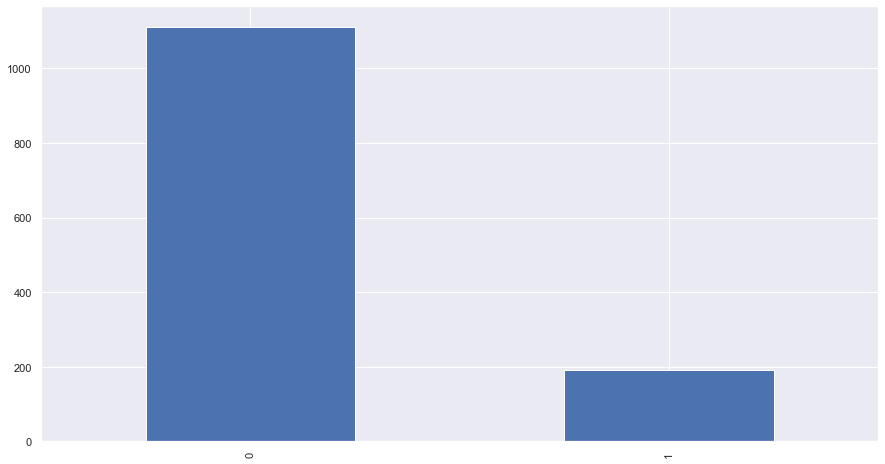

In [21]:
df['Touchscreen'].value_counts().plot(kind='bar') # touch screen value count

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

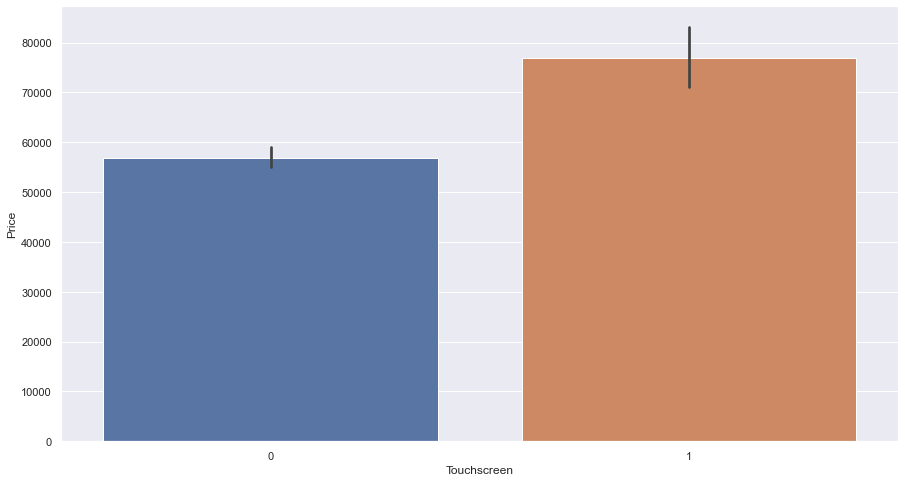

In [22]:
sns.barplot(x=df['Touchscreen'],y=df['Price']) # comparing touchscreen by price
# touch screen are high rate than normal screen, eventhough it has low value counts

In [23]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0) 
# seperate ips from screen resolution and make new colum called ips
# An IPS display is an example of a panel type in an LCD technology display. 
#This technology uses liquid crystals to produce colors in a parallel configuration. 
# IPS stands for in-plane switching, a type of LED (a form of LCD) display panel technology.

<AxesSubplot:>

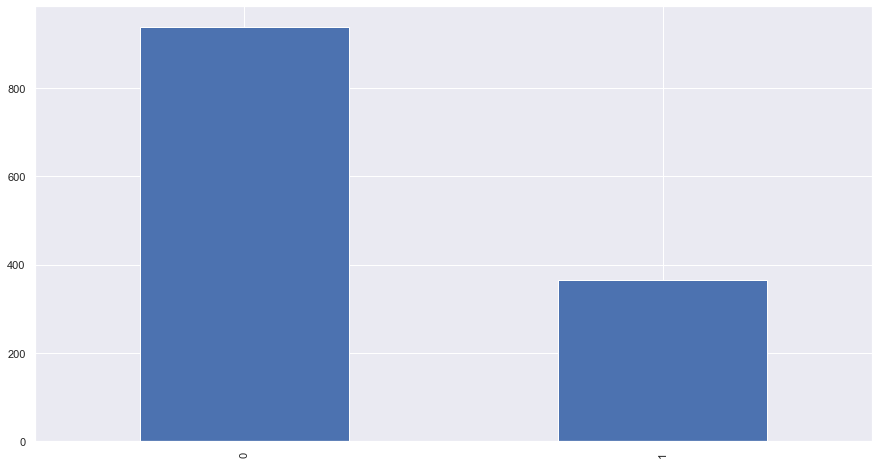

In [24]:
df['Ips'].value_counts().plot(kind='bar') # checking ips value counts

<AxesSubplot:xlabel='Ips', ylabel='Price'>

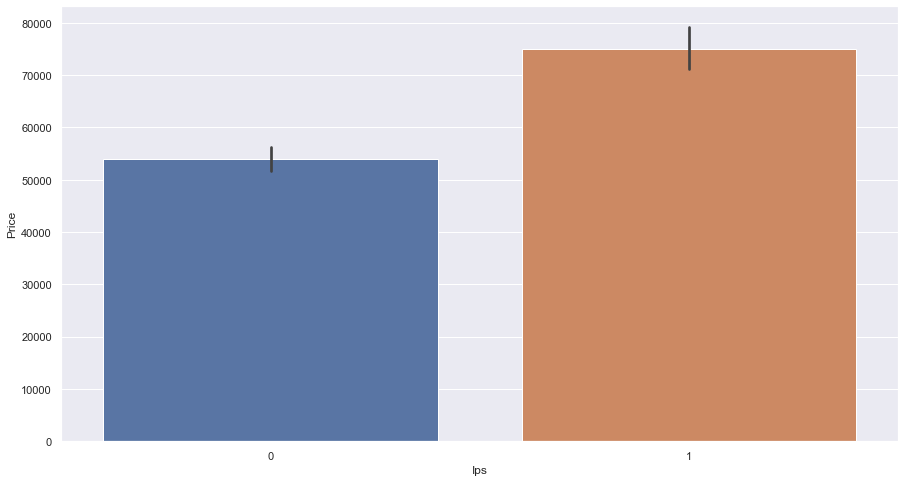

In [25]:
sns.barplot(x=df['Ips'],y=df['Price']) # comparing ips by price 
# IPS (in-plane switching) is high rate

In [26]:
# seperate the screen resolution x and y 
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [27]:
df['X_res'] = new[0] # x resolution
df['Y_res'] = new[1] # y resolution

In [28]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) 
# removing string in x_res to get x resolution

In [29]:
df['X_res'] = df['X_res'].astype('int') # changing dtypes into int
df['Y_res'] = df['Y_res'].astype('int') # changing dtypes into int

In [30]:
# Pixels per inch
# finding pixel per inch by dividing x and y by incheds
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [31]:
df.corr()['Price']# finding corelation of price with each columns

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [32]:
# drop unwanted features
df.drop(columns=['ScreenResolution'],inplace=True) # i take all infromation from screen resolution and seperate the column
# so. i dont want screen resolution now
df.drop(columns=['Inches','X_res','Y_res'],inplace=True) # i create PPI columns, so x_res and y_res are not necessary now

#### CPU

In [33]:
df['Cpu'].value_counts() # FINDING VALUE COUNTS IN CPU

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i3 6100U 2.1GHz         1
AMD E-Series E2-9000 2.2GHz        1
Intel Core M 6Y54 1.1GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Intel Xeon E3-1535M v5 2.9GHz      1
Name: Cpu, Length: 118, dtype: int64

In [34]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) # creat cpu name without ghz
# taking only cpu name with help of lambda function

In [35]:
# function for seperate intel processor , amd processor and other processer
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text 
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [36]:
df['Cpu brand'] = df['Cpu Name'].apply(processor) # apply above processor function here to creat  cpu brand columns
# now new column are created with brand name

<AxesSubplot:>

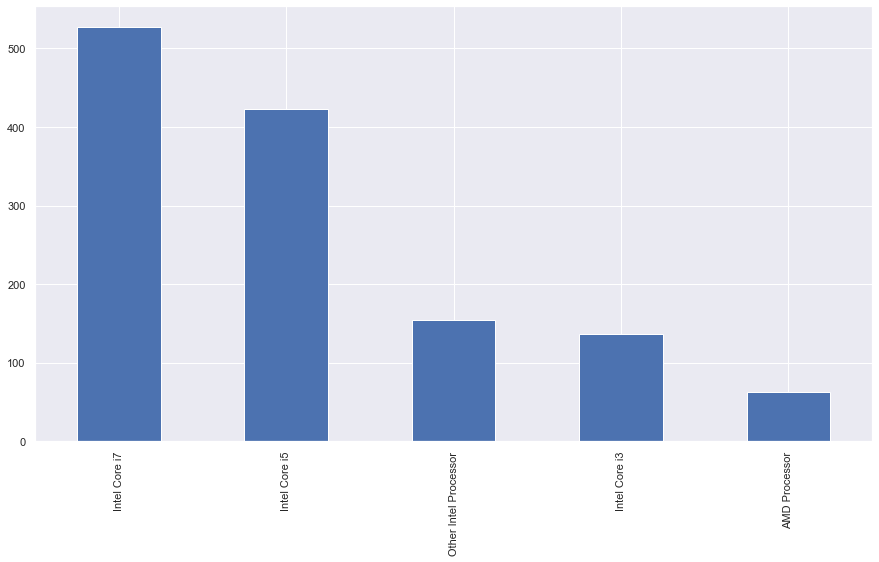

In [37]:
df['Cpu brand'].value_counts().plot(kind='bar') # cpu brand by count

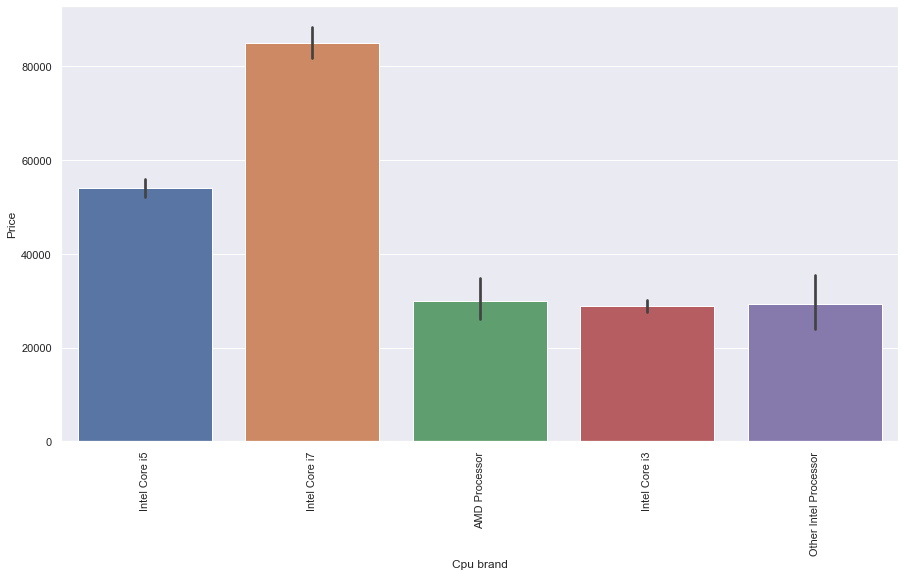

In [38]:
# cpu brand by price
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True) # drop cpu and cpu name columns

#### RAM

<AxesSubplot:>

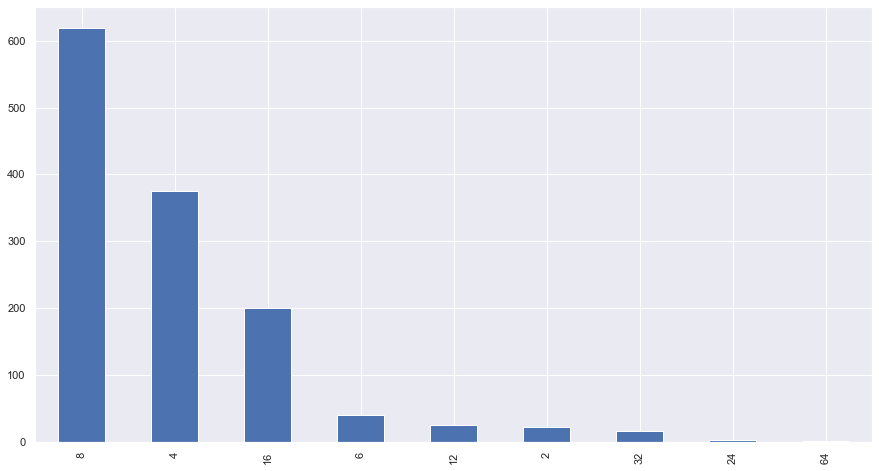

In [40]:
df['Ram'].value_counts().plot(kind='bar') # Value count for ram

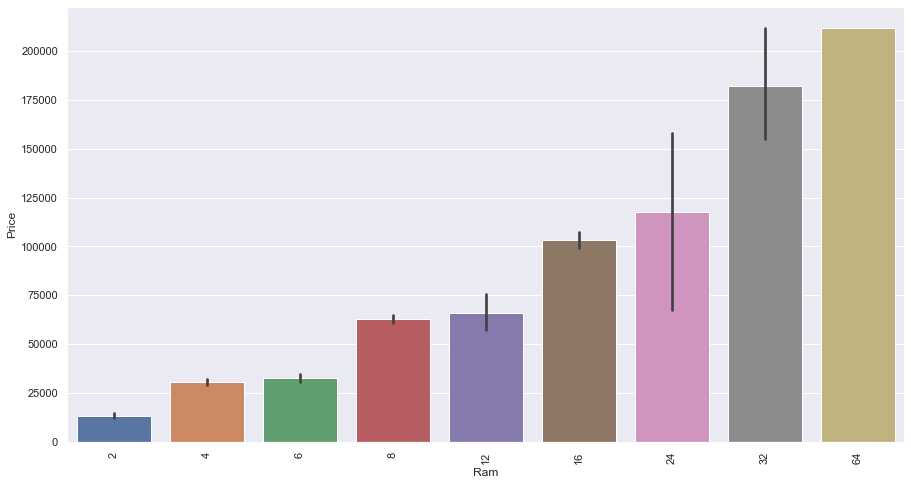

In [41]:
# ram by price
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# if ram is increase , prices also increase , you can see ram 64 is low in counts, but high in price,

In [42]:
df['Memory'].value_counts() # value count for memory

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
8GB SSD                            1
5

In [43]:
# creating new column for memory types in memory
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '') # replace gb by white space
df["Memory"] = df["Memory"].str.replace('TB', '000') # replace tb by 000
new = df["Memory"].str.split("+", n = 1, expand = True) # spliting the column after +

df["first"]= new[0] # before +
df["first"]=df["first"].str.strip() # remove unwanted simple

df["second"]= new[1] # after +

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0) # seperate hdd memory
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0) # seperate ssd memeory
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0) # seperate hybrid memory
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0) # seperate flash storage

df['first'] = df['first'].str.replace(r'\D', '') # replace if any digits with nothing

df["second"].fillna("0", inplace = True) # fill null with 0' if nothing will replace with 0
# same process for layer2
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0) # seperate hdd memory
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0) # seperate ssd memeory
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0) # seperate hybrid memory
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)# seperate flash storage

df['second'] = df['second'].str.replace(r'\D', '')# replace if any digits with nothing

df["first"] = df["first"].astype(int) # changing dtypes with int 
df["second"] = df["second"].astype(int)# changing dtypes with int 

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"]) # creat new colunm hdd
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"]) # creat new column ssd
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"]) # creat new column hybrid
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"]) # creat new column flash storage

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True) # drop all un necessary column after creating hdd,ssd,hybrid,flashstorage memeory

<ipython-input-43-9e41ad95db5d>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '') # replace if any digits with nothing
<ipython-input-43-9e41ad95db5d>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')# replace if any digits with nothing


In [44]:
df.drop(columns=['Memory'],inplace=True) # seperate all required things in memory, so i just drop memory as well

In [45]:
df.corr()['Price']# finding corelation of price with each newly created column

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [46]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True) # hybrid and flas storage have low corealtion with price ,
#so i drop those features

#### GPU

In [47]:
df['Gpu'].value_counts() # checking value counts foe gpu

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R7 M360           1
Intel HD Graphics 530        1
AMD FirePro W5130M           1
AMD Radeon R3                1
Intel HD Graphics 540        1
Name: Gpu, Length: 110, dtype: int64

In [48]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])  # seperate gpu brand with delimeter of first word

In [49]:
df['Gpu brand'].value_counts() # gpu brand value count

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [50]:
df = df[df['Gpu brand'] != 'ARM'] # remove arm because it has only one records

In [51]:
df['Gpu brand'].value_counts() # check value count again

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

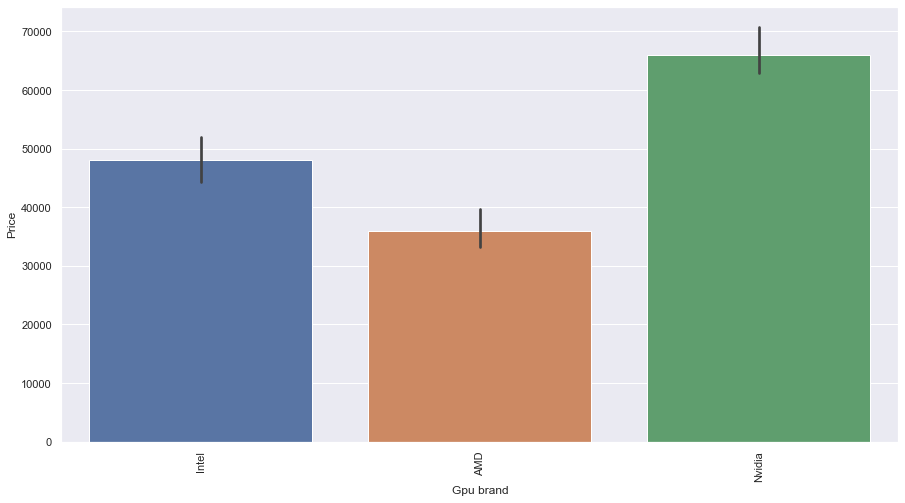

In [52]:
# gpu brand by price
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
df.drop(columns=['Gpu'],inplace=True) # drop gpu column

#### OPSYS 

In [54]:
df['OpSys'].value_counts() # n uniques of opsys

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

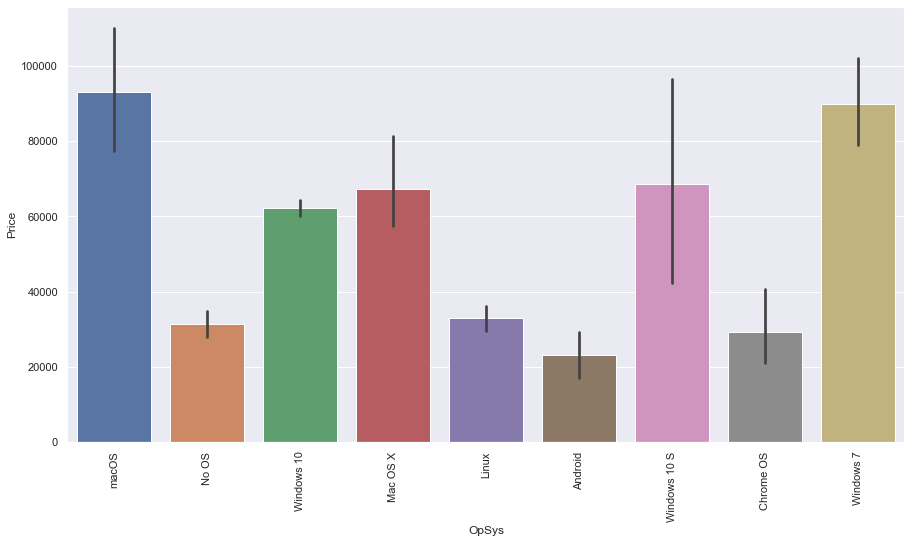

In [55]:
# opsys by price
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# function for seperate os # seperate windows, mac and other
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [57]:
df['os'] = df['OpSys'].apply(cat_os) # apply above function for os new columns

In [58]:
df.drop(columns=['OpSys'],inplace=True) # drop opsys column after create os column

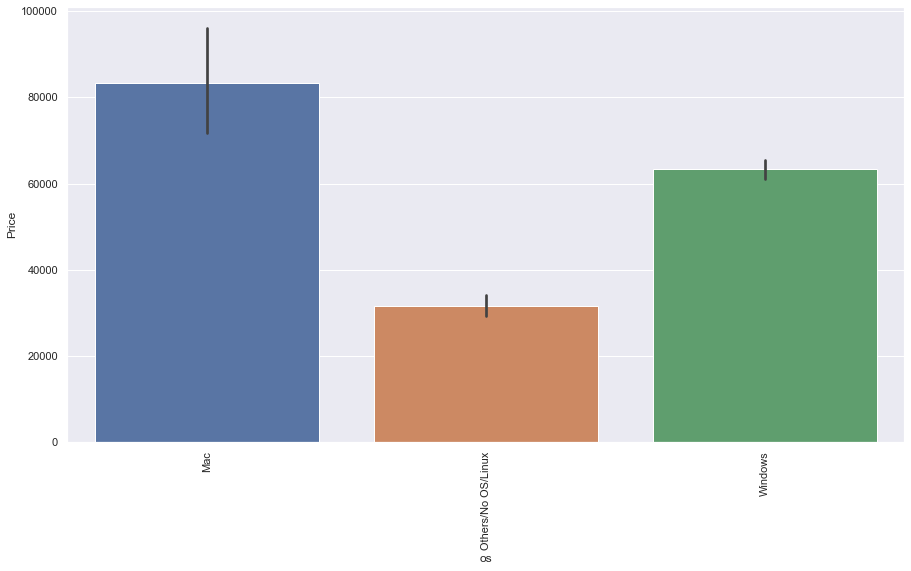

In [59]:
# os by price
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

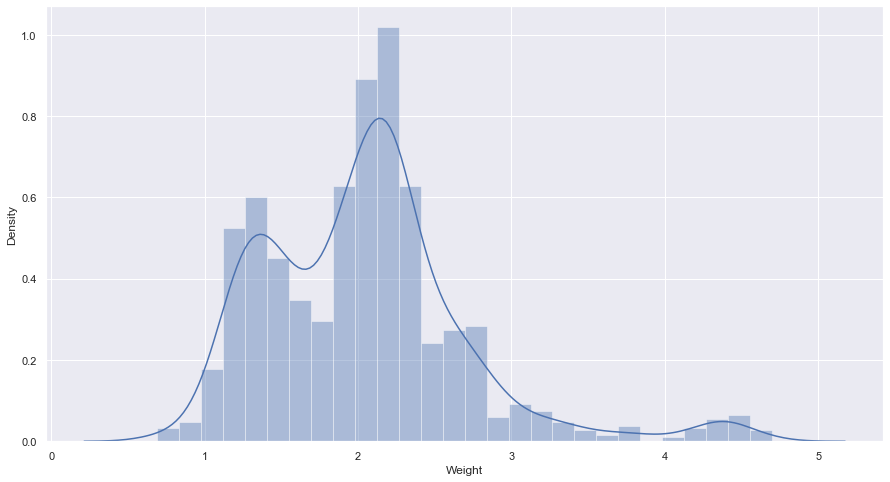

In [60]:
sns.distplot(df['Weight']) # distribution of weight

<AxesSubplot:xlabel='Weight', ylabel='Price'>

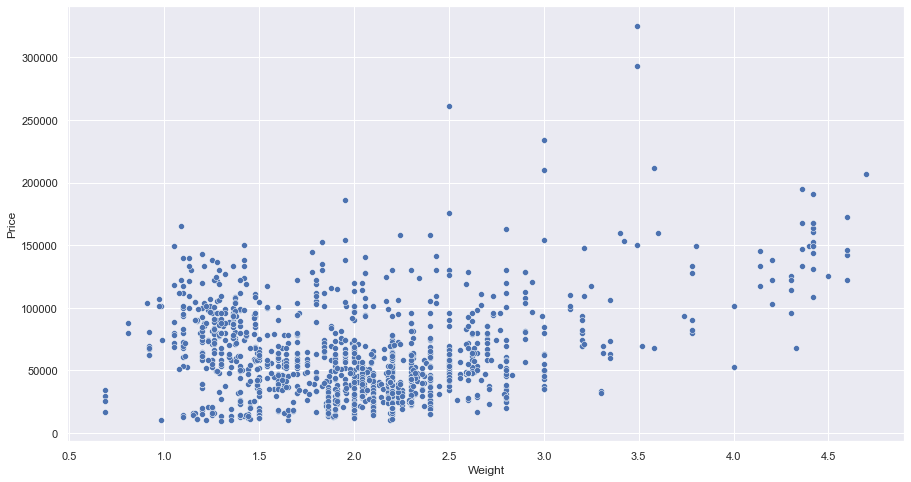

In [61]:
sns.scatterplot(x=df['Weight'],y=df['Price']) # distribution of weight by price

In [62]:
# conclusion for EDA

# overall laptops which have high end models are high in prices 
# laptops company such as apple , razer are high in price comparing with others like lenova,eventhough it has lesser counts
# ram with more than 12 has high rate, we can see, if ram increase prices also increase.
# coming with os in laptops mac is expensive.
# intel icore 7 is bought by more often.
# if scree resolution is high , price is also high
# touch screen and ips screen are high in rate compare with others
# weight of the laptops is not a normal distribution because some gaming laptos and high end laptops are high rate and also high weight


# Feature Selection

In [63]:
df.head() # checking all columns after pre - processing

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


                  Ram    Weight     Price  Touchscreen       Ips       ppi  \
Ram          1.000000  0.383362  0.742905     0.118875  0.207949  0.305688   
Weight       0.383362  1.000000  0.209867    -0.293004  0.018643 -0.321883   
Price        0.742905  0.209867  1.000000     0.192917  0.253320  0.475368   
Touchscreen  0.118875 -0.293004  0.192917     1.000000  0.148026  0.458571   
Ips          0.207949  0.018643  0.253320     0.148026  1.000000  0.299142   
ppi          0.305688 -0.321883  0.475368     0.458571  0.299142  1.000000   
HDD          0.095808  0.514147 -0.096891    -0.208766 -0.093588 -0.294698   
SSD          0.603379 -0.063818  0.670660     0.257577  0.225311  0.509437   

                  HDD       SSD  
Ram          0.095808  0.603379  
Weight       0.514147 -0.063818  
Price       -0.096891  0.670660  
Touchscreen -0.208766  0.257577  
Ips         -0.093588  0.225311  
ppi         -0.294698  0.509437  
HDD          1.000000 -0.400750  
SSD         -0.400750  1.

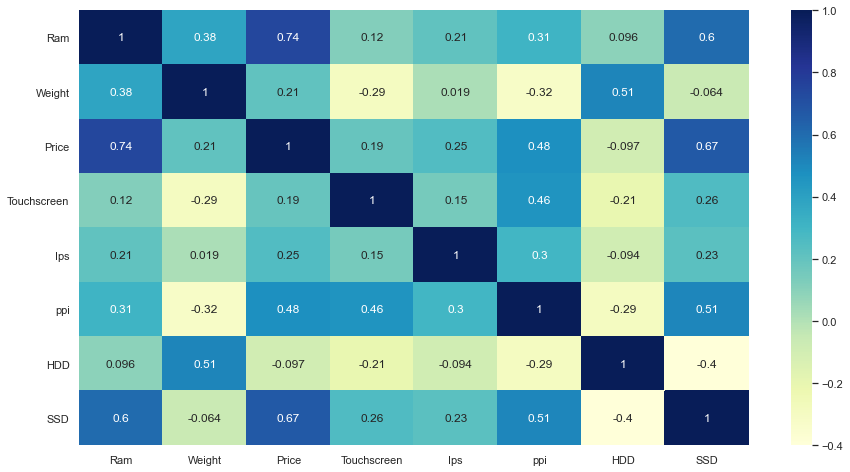

In [64]:
# using heat map showing corelation
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [65]:
# all features are required and more importand to build the model. thus, i am not going too drop any features

# splitting the data

In [66]:
X = df.drop(columns=['Price']) # assigning x value
y = np.log(df['Price']) # assigning y value

In [67]:
from sklearn.model_selection import train_test_split # splitting the records for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2) # 15% of data for testing, rest training

### Linear regression

In [68]:
# linear regression mode
# creat pipeline for training the model, in pipeline i use following techniques 
# step 1 - one hot encoding
# step 2 - model object

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]) # drop one columns for getting ride of tummy variable trap
],remainder='passthrough') # one hot encoding, convert categorical into numeric,
#it create column for each categories located in particular column for encoding

step2 = LinearRegression() # object

pipe = Pipeline([
    ('step1',step1), # one hot encoding
    ('step2',step2) # linear regression object
])

pipe.fit(X_train,y_train) # fit the model using pipe.fit

y_pred = pipe.predict(X_test) # y_pred for evaluation

print('R2 score',r2_score(y_test,y_pred)) # r2 score
print('MAE',mean_absolute_error(y_test,y_pred)) # mean_absolute_error

R2 score 0.8073277448418521
MAE 0.21017827976429174


### Ridge Regression

In [69]:
# Ridge regression mode
# creat pipeline for training the model
# step 1 - one hot encoding
# step 2 - model object
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]) # drop one columns for getting ride of tummy variable trap
],remainder='passthrough')
 # one hot encoding, convert categorical into numeric,
#it create column for each categories located in particular column for encoding
step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),# one hot encoding
    ('step2',step2)# ridge regression object
])

pipe.fit(X_train,y_train)# fit the model using pipe.fit

y_pred = pipe.predict(X_test) # y_pred for evaluation

print('R2 score',r2_score(y_test,y_pred))# r2 score for ridge regression
print('MAE',mean_absolute_error(y_test,y_pred))# r2 score for ridge regression

R2 score 0.8127331031311811
MAE 0.20926802242582954


### Lasso Regression

In [70]:
# Lasso regression mode
# creat pipeline for training the model
# step 1 - one hot encoding
# step 2 - model object
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])# drop one columns for getting ride of tummy variable trap
],remainder='passthrough')
 # one hot encoding, convert categorical into numeric,
#it create column for each categories located in particular column for encoding
step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),# one hot encoding
    ('step2',step2)# object
])

pipe.fit(X_train,y_train) # fitmodel using pipe

y_pred = pipe.predict(X_test)# y_pred for evaluation

print('R2 score',r2_score(y_test,y_pred))# r2 score for lasso regression
print('MAE',mean_absolute_error(y_test,y_pred))# r2 score for lasso regressionprint('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


### KNN

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8021984604448553
MAE 0.19319716721521116


### Decision Tree

In [72]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8342435315017607
MAE 0.184467001713893


### Exporting the Model

In [73]:
# DUMP PICKEL FILE FOR PRODUCTION 
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [74]:
#conclusion
#Using the Decision Tree regression method and machine learning to predict anything makes it simple for us, 
#especially when determining which laptop characteristics are most desirable for us based on our needs and purchasing power.
#As I mentioned earlier decision tree regression is more powerful in the way of predicting laptops price.
#So, I take this model into production. 
#it gives the less error when compared to another model which I am using in this project.
